<a href="https://colab.research.google.com/github/ShreeKeshavan/Car_price_prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [408]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

# visualisation modifiers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style = 'darkgrid',font_scale=1.5)
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [409]:
df = pd.read_csv('/content/cars_price.csv')

In [410]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [411]:
# Shape of the data :
df.shape

(205, 26)

In [412]:
# Dataframe information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

From above output we can observe that 16 categorical & 11 numerical Attributes.

All the features are not having correct data-types. So we need to analyse the reason.

All the features are not having correct data-types because of unknown in tha data frame filled with "?" symbol

In [413]:
# Describing the data :
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [414]:
#to check duplicates
df.duplicated().sum()

0

From the above output we can say that there is no duplicate records present in our dataset.

In [415]:
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

There is no zero variance variable

In [416]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

There are no null values currently because the null values are all filled with "?" symbols.

In [417]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [418]:
#to count the '?' or unknown values present in the dataframe 
has_question_mark = df == "?"
columnwise_results = has_question_mark.sum()
columnwise_results

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [419]:
df.drop('normalized-losses',axis=1,inplace=True)

In [420]:
#converting "?" values to null 
df.replace("?", np.nan, inplace=True)

In [421]:
#total null values in the data set
df.isnull().sum().sum()

18

In [422]:
df = df.fillna(method='ffill')

In [423]:
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

many numerical columns are in obj type lets convert them

In [424]:
print(df.dtypes)

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [425]:
columns_to_convert_int = df[['horsepower','peak-rpm']]
for col in columns_to_convert_int:
    df[col] = df[col].astype(int)

columns_to_convert_float = df[['bore','stroke','price']]
for col in columns_to_convert_float:
    df[col] = df[col].astype(float)

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

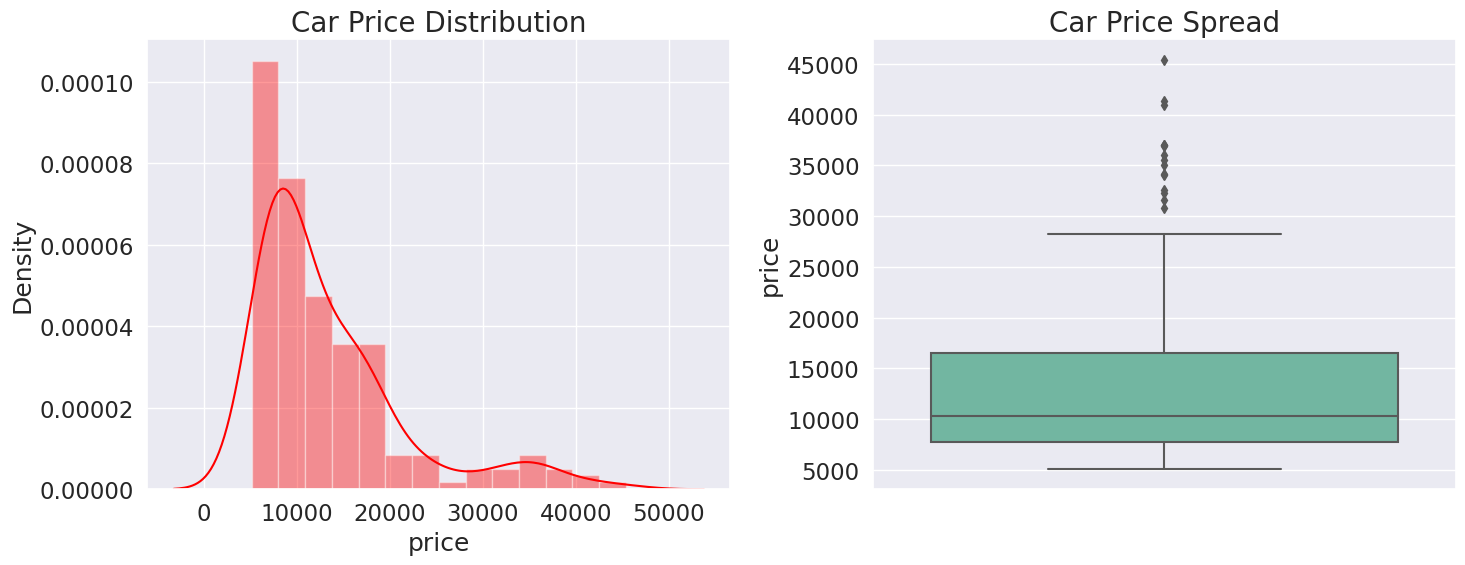

In [427]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread",fontsize=20)
plt.tight_layout() # to adjusts the spacing between subplots
plt.show()

In [428]:
df["price"].agg(["min","mean","median","max","std","skew"]).to_frame()

,price
min,5118.000000
mean,13312.712195
median,10295.000000
max,45400.000000
std,8102.472461
skew,1.766400


 **Insights**

* We can clearly observe that our Car Price Feature is Right Skewed.
* We can clearly observe that there is a significant difference between mean & median value.
* We can also make an insight that most of the car's price is below 14000.
* We can also that the skewness of the car price is above 1.5 which means that the data points are highly spread.

Visualizing Total No. of cars sold by different company.

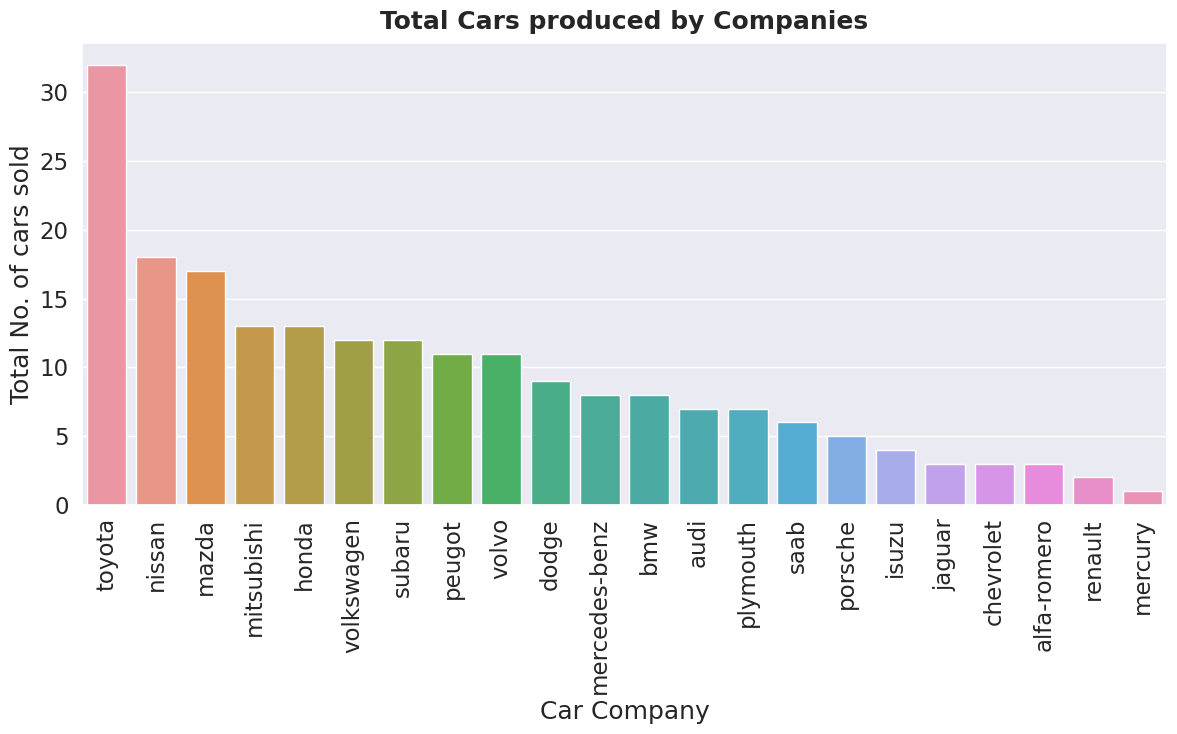

In [465]:
plt.figure(figsize=(14,6))
counts = df["make"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=10, fontweight="black")
plt.xticks(rotation=90)
plt.show()

**Insights**
* Toyota seems to be the most favoured cars.
* Mercury seems to be the least favoured cars.
* So we can say that Toyota is kind of customers most favoured company.
Nisaan ,Mercury or renault are having very low data-points. So we can't make any inference of least sold car companies.

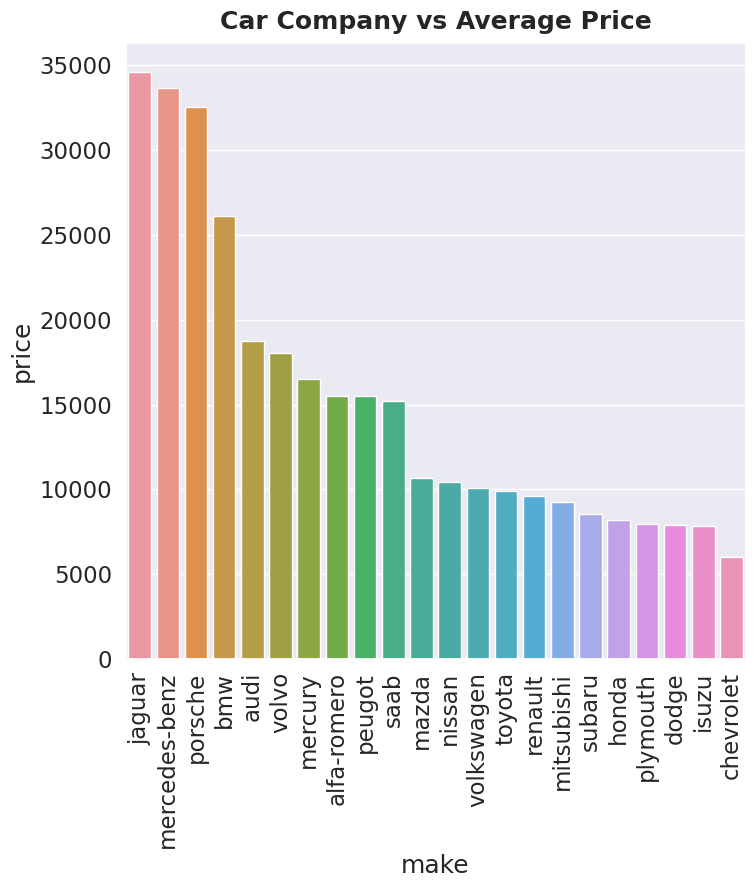

In [471]:
x = pd.DataFrame(df.groupby("make")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black")
plt.show()

**Insights**

* Jaguar & buick seems to have the highest price range cars.
* Chevrolet seems to have the lowest price range cars.

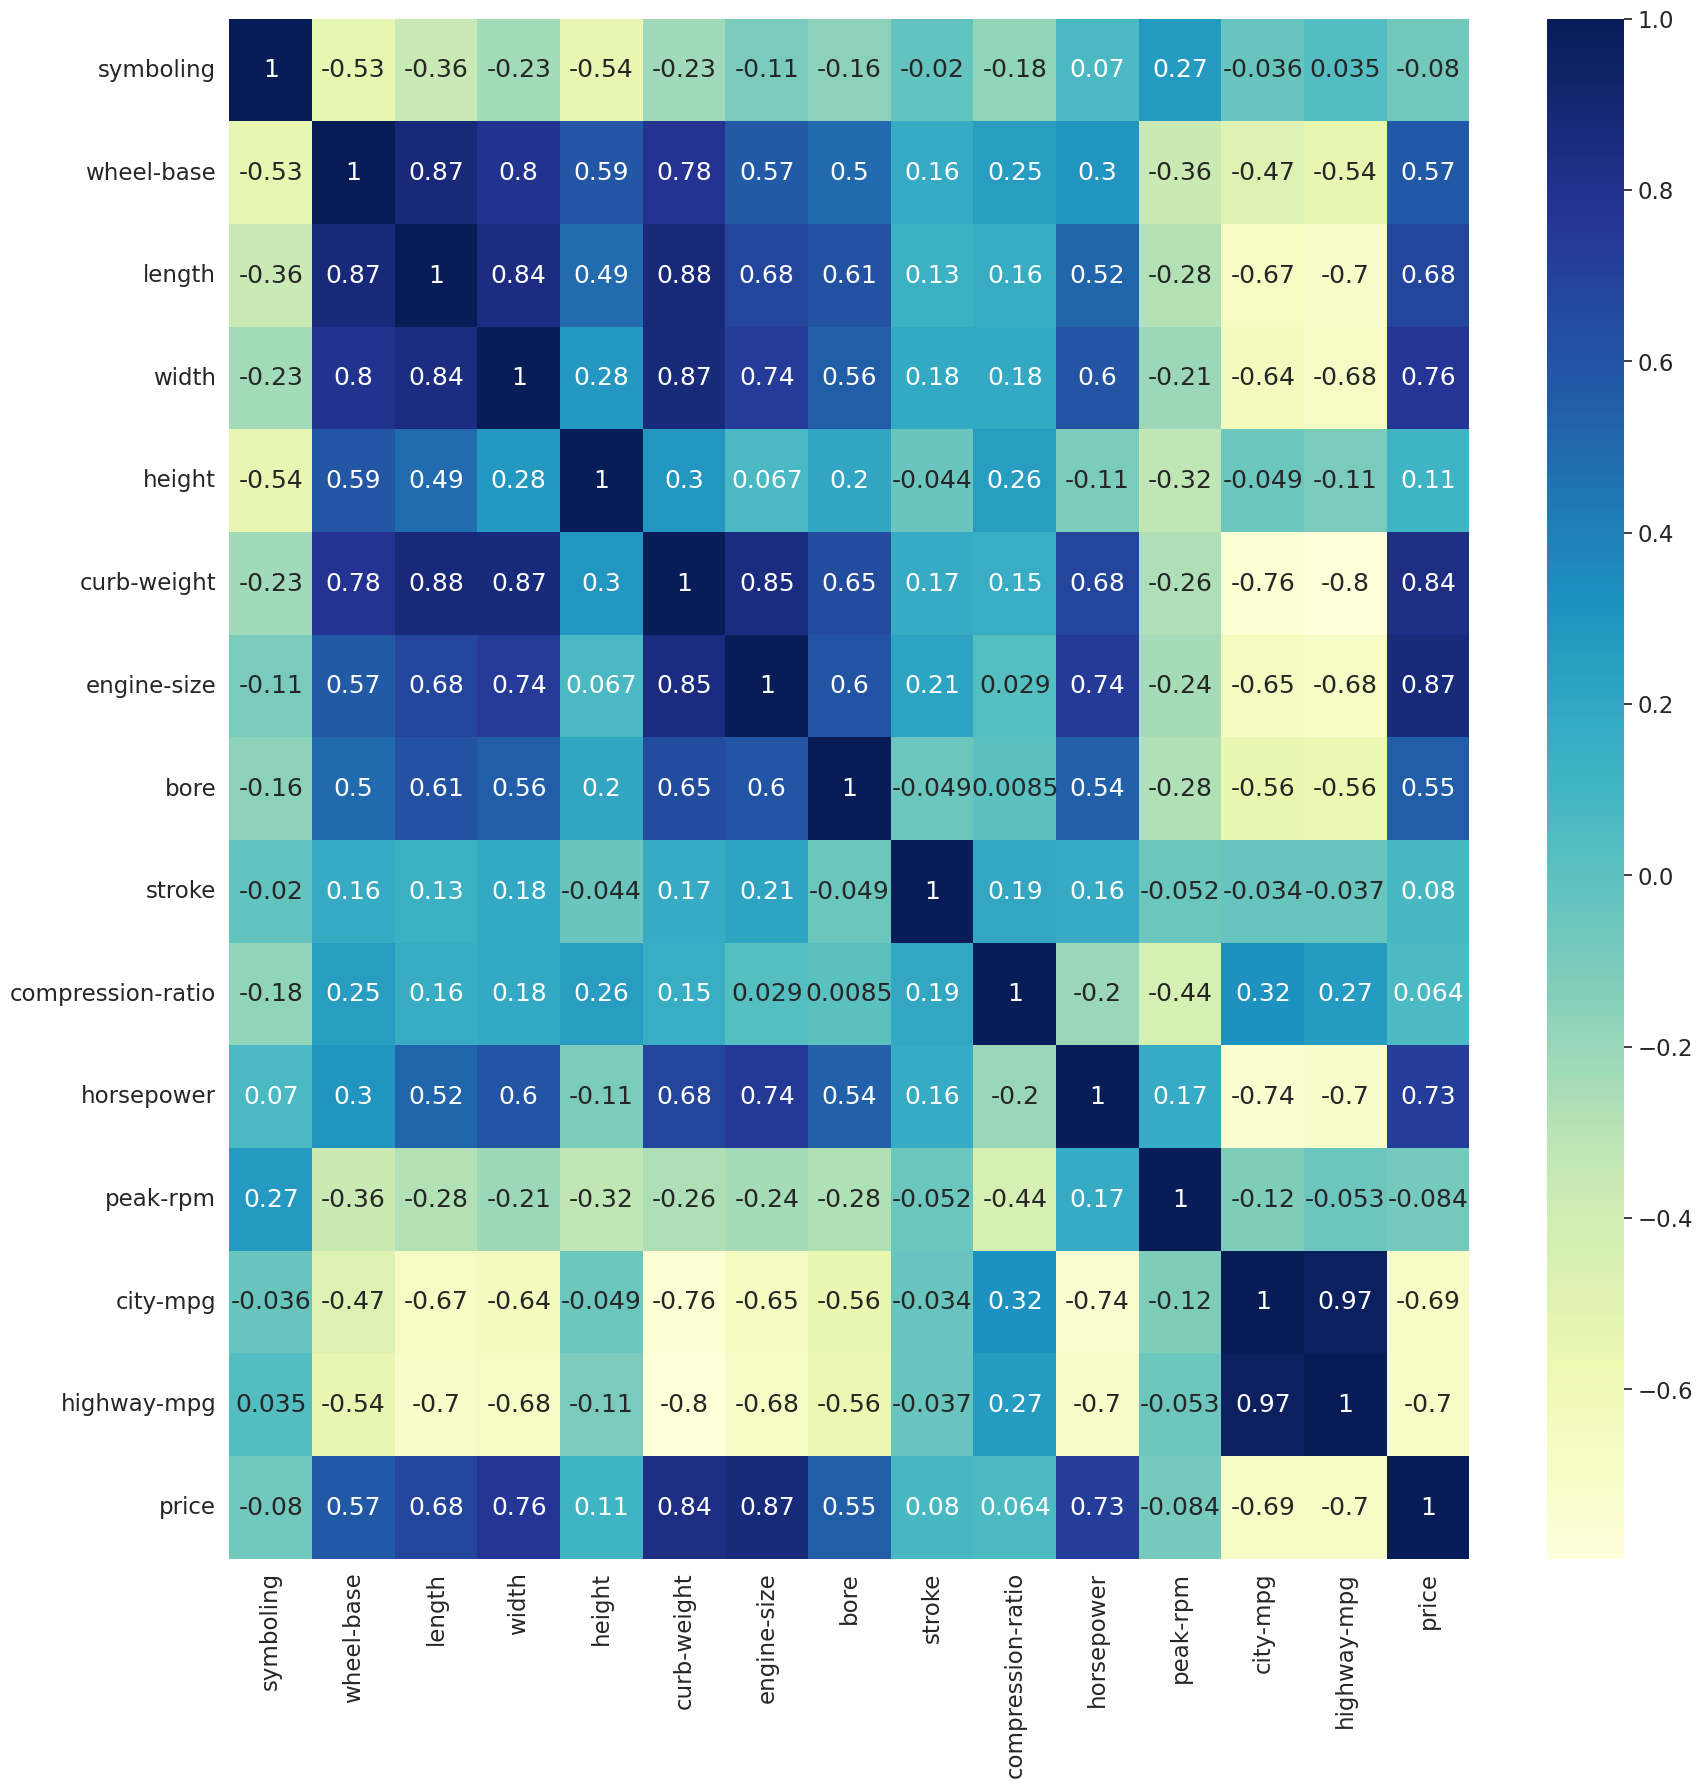

In [476]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [480]:
numeric_features = df.select_dtypes(include=[np.number])
cor = numeric_features.corr()
print(cor['price'].sort_values(ascending = False),'\n')

price                1.000000
engine-size          0.870751
curb-weight          0.835657
width                0.764977
horsepower           0.725481
length               0.678818
wheel-base           0.571784
bore                 0.549438
height               0.112421
stroke               0.079775
compression-ratio    0.064381
symboling           -0.080149
peak-rpm            -0.083675
city-mpg            -0.690580
highway-mpg         -0.698389
Name: price, dtype: float64 

